In [1]:
from math import log10
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import log_loss
warnings.filterwarnings('ignore')

In [2]:
# read the data into dataframe
data =  pd.read_csv('dataset.txt', sep="\t")

In [3]:
# check columns
data.columns

Index(['Species', 'FrontalLip', 'RearWidth', 'Length', 'Width', 'Depth',
       'Male', 'Female'],
      dtype='object')

In [4]:
# check the shape
data.shape

(200, 8)

In [5]:
# preview some data
data.head()

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1


In [6]:
label = data['Species']

df = data.iloc[:,1:]

In [7]:
# divide dataset into train , test , validation
from sklearn.model_selection import train_test_split
Xtrain, test, Ytrain, ytest = train_test_split(
    df, label, 
    test_size=0.3, 
    random_state=2021
)



# split test into 15% of the total dataset each
Xtest, Xvalid, Ytest, Yvalid = train_test_split(
    test, ytest, 
    test_size=0.5, 
    random_state=2021
)


In [8]:
# check the percentage for each

print(f"Trainset has  {Xtrain.shape[0]/df.shape[0]*100} %")
print(f"Test set has  {Xtest.shape[0]/df.shape[0]*100} %")
print(f"Validation set has  {Xvalid.shape[0]/df.shape[0]*100} %")

Trainset has  70.0 %
Test set has  15.0 %
Validation set has  15.0 %


In [9]:
class Gradiend_descent_and_SDG_algorithm:
    '''
    try Implimenting gradient descent  and schostatic gradient descent algorithm
    you need to pass data , labels , learning rate and model type to choose
    '''
    def __init__(self , X , y  , lr , iterations , model_type):
        self.X = X
        self.model_type= model_type
        self.y = y.values
        self.lr = lr
        self.iterations = iterations
        self.loss_ = []
        # Initialize the weight and bais
        self.parameters = {} 
        self.parameters["weight"] = np.zeros(X.shape[1])
        self.parameters["bias"] = 0
        
    def sigmoid(self ,input):    
        self.output = 1 / (1 + np.exp(-input))
        return self.output
    
    def check_loss(self ,bias , weights):
        pred_values = np.dot(self.X, weights) + bias
        preds = self.sigmoid(pred_values)
        
        return preds
        
        
    
    def GD(self): 
        size = self.X.shape[0]
        weight = self.parameters["weight"] 
        bias = self.parameters["bias"]
        for i in range(self.iterations): 
                sigma = self.sigmoid(np.dot(self.X, weight) + bias)
                loss = -1/size * np.sum(self.y * np.log(sigma)) + (1 - self.y) * np.log(1-sigma)
                dW = 1/size * np.dot(self.X.T, (sigma - self.y))
                db = 1/size * np.sum(sigma - self.y)
                weight -= self.lr * dW
                bias -= self.lr * db 
                
                #get loss
                epoch_loss = log_loss(self.y , self.check_loss(bias , weight))
                self.loss_.append(epoch_loss)
        

        self.parameters["weight"] = weight
        self.parameters["bias"] = bias
        return self.parameters
    def SDG(self):
        size = self.X.shape[0]
        weight = self.parameters["weight"] 
        bias = self.parameters["bias"]

        for epoch in range(self.iterations):
            y_pred = self.sigmoid(np.dot(self.X, weight) + bias)
            #loss for weights
            D_b0 = -2 * np.sum((self.y - y_pred) * y_pred * (1 - y_pred)) 
            #loss for biases
            D_b1 = -2 * np.sum(self.X.T * (self.y - y_pred) * y_pred * (1 - y_pred)) 
            weight = weight - self.lr * D_b0
            bias = bias - self.lr * np.sum(D_b1)/size
        
            #get loss
            epoch_loss = log_loss(self.y , self.check_loss(bias , weight))
            self.loss_.append(epoch_loss)

        self.parameters["weight"] = weight
        self.parameters["bias"] = bias
        return self.parameters

    def train(self):
        if self.model_type == "SGD":
            self.parameters = self.SDG()
        else:
            self.parameters = self.GD()
        return self.parameters
    
    
    def predict_proba(self , X):
        output_values = np.dot(X, self.parameters["weight"]) + self.parameters["bias"]
        predictions = self.sigmoid(output_values)
        return predictions
    def predict(self , X , upper = 0.5):
        preds = self.predict_proba(X)
        preds = [1 if v >=upper else 0 for v in preds]
        return np.array(preds)
    def compute_log_loss(self ,A,B):
        n = len(A)
        res = 0
        for l in zip(A,B):
            res += l[0] * np.log(l[1]) + (1 - l[0]) * np.log(1 - l[1])                   
        loss = (-1 * res) / n
        return loss
    

In [10]:
# create model instances for both algorith
grad_desc = Gradiend_descent_and_SDG_algorithm(Xtrain ,Ytrain , 0.001 , 400 , "DG") 
SGD = Gradiend_descent_and_SDG_algorithm(Xtrain ,Ytrain , 0.001 , 400 , "SGD")

In [11]:
# train both models
grad_desc.train()
SGD.train()

{'weight': array([0.010742, 0.010742, 0.010742, 0.010742, 0.010742, 0.010742,
        0.010742]),
 'bias': -0.9548547328761037}

In [12]:
sgd_w = SGD.parameters['weight']
sgd_b = SGD.parameters['bias'].round(3)
sgd_w = sgd_w.round(3)
print("Decision Boundary for Schostatic Descent is ..")
print(f"y = X*{sgd_w[0]} + X*{sgd_w[1]} + X*{sgd_w[2]} + X*{sgd_w[3]} + X*{sgd_w[4]}+X*{sgd_w[5]} X*{sgd_w[6]} + {sgd_b}")

Decision Boundary for Schostatic Descent is ..
y = X*0.011 + X*0.011 + X*0.011 + X*0.011 + X*0.011+X*0.011 X*0.011 + -0.955


In [13]:
grad_w = grad_desc.parameters['weight']
grad_b = grad_desc.parameters['bias'].round(3)
grad_w = grad_w.round(3)
print("Decision Boundary for Schostatic Descent is ..")
print(f"y = X*{grad_w[0]} + X*{grad_w[1]} + X*{grad_w[2]} + X*{grad_w[3]} + X*{grad_w[4]}+X*{grad_w[5]} X*{grad_w[6]} + {grad_b}")

Decision Boundary for Schostatic Descent is ..
y = X*-0.102 + X*-0.009 + X*-0.011 + X*0.102 + X*-0.115+X*0.01 X*0.003 + 0.013


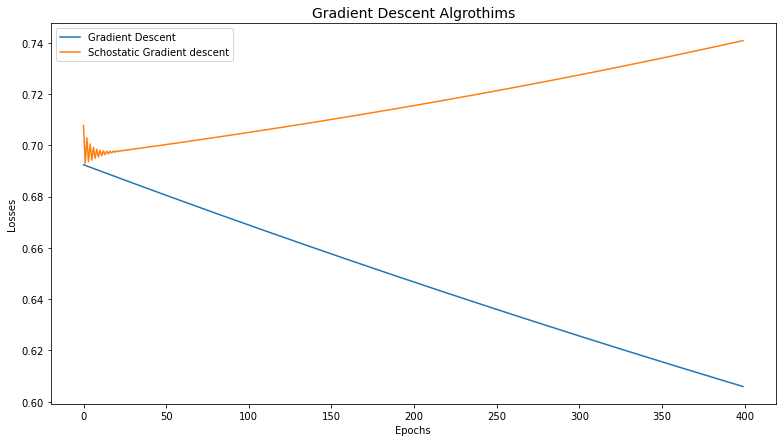

In [14]:
# plot gradient descent model results
plt.figure(figsize=(13,7))
plt.plot(range(len(grad_desc.loss_)), grad_desc.loss_ , label="Gradient Descent")
plt.plot(range(len(SGD.loss_)), SGD.loss_ , label = 'Schostatic Gradient descent')
plt.title('Gradient Descent Algrothims', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.savefig("gd.png")
plt.legend()
plt.show()

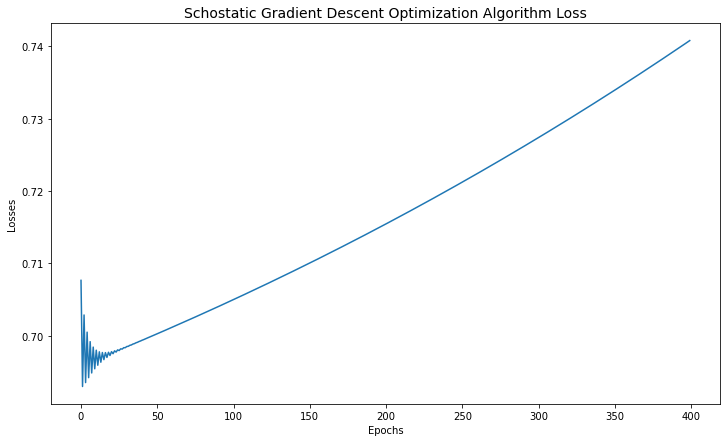

In [15]:
# plot  schostatic gradient descent loss
plt.figure(figsize=(12,7))
plt.plot(range(len(SGD.loss_)), SGD.loss_)
plt.title('Schostatic Gradient Descent Optimization Algorithm Loss', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.savefig("sgd.png")
plt.show()

In [16]:
# get the accuracy for each model on the test set
from sklearn.metrics import accuracy_score
print(f"Accuracy score for SGD is  {accuracy_score(Yvalid , SGD.predict(Xvalid , 0.7))*100}%")
print(f"Accuracy Score for Gradient Descent is {accuracy_score(Yvalid , grad_desc.predict(Xvalid))*100}%")

Accuracy score for SGD is  76.66666666666667%
Accuracy Score for Gradient Descent is 100.0%


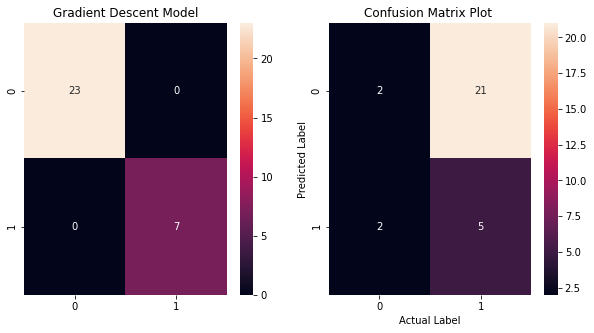

In [17]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix1 = confusion_matrix(Yvalid , grad_desc.predict(Xvalid))
fig, ax = plt.subplots(1,2 , figsize=(10,5))
sns.heatmap(c_matrix1 , annot= True , annot_kws={"size": 10} , ax=ax[0] )
ax[0].set_title("Gradient Descent Model")
c_matrix2 = confusion_matrix(Yvalid , SGD.predict(Xvalid))
sns.heatmap(c_matrix2 , annot= True , annot_kws={"size": 10} , ax =ax[1])
ax[1].set_title("Schostatic Gradient Descent Model")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix Plot ")
plt.savefig("ConfusionMatrix.png")

In [18]:

class GDA:
    """
    Impliments Gaussian discriminant analysis (GDA) classifier
    """
    def __init__(self , X , y):
        self.X = X
        self.y = y.values
        self.m = self.y.shape[0]
        self.X = self.X.values.reshape(self.m, -1)
        input_feature = self.X.shape[1] 
        self.class_label = len(np.unique(self.y.reshape(-1))) 
        self.mu = np.zeros((self.class_label, input_feature))
        self.sigma = np.zeros((self.class_label, input_feature, input_feature))
        self.phi = np.zeros(self.class_label)
    
    def fit(self):
        for label in range(self.class_label):
            indices = (self.y== label)
            self.phi[label] = float(np.sum(indices)) / self.m
            self.mu[label] = np.mean(self.X[indices, :], axis=0)
            self.sigma[label] = np.cov(self.X[indices, :], rowvar=0)

        return self.phi, self.mu, self.sigma

    def predict(self , X):
        #flattern
        X = X.values
        X = X.reshape(X.shape[0], -1)
        class_label = self.mu.shape[0]
        scores = np.zeros((X.shape[0], class_label))
        for label in range(class_label):
            normal_distribution_prob = multivariate_normal(mean=self.mu[label], cov=self.sigma[label] , allow_singular=True)
            for i, X in enumerate(X):
                scores[i, label] = np.log(self.phi[label]) + normal_distribution_prob.logpdf(X)
        return np.array([list(val/sum(val)) for val in scores])



In [19]:
Xtrain.shape , Ytrain.shape

((140, 7), (140,))

In [20]:
from sklearn.metrics import f1_score
from scipy.stats import multivariate_normal


gda = GDA(Xtrain,Ytrain)
phi, mu, sigma = gda.fit()

In [21]:

y_predict = gda.predict(Xtest)


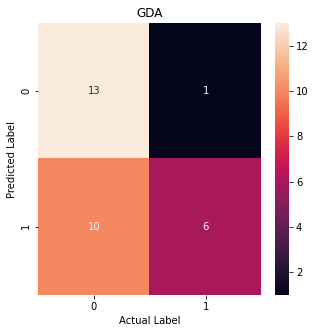

In [22]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Ytest , y_predict.argmax(1))
plt.figure(figsize=(5,5))
sns.heatmap(c_matrix , annot= True , annot_kws={"size": 10})
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("GDA")
plt.savefig("gda.png")

In [23]:
log_loss(Ytest, y_predict)

11.585451517124875

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.652


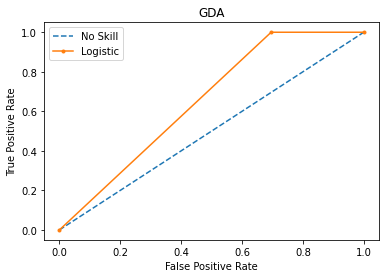

In [25]:
lr_probs = gda.predict(Xvalid)
lr_probs = lr_probs[: , 0]
ns_probs = [0 for _ in range(len(Xvalid))]
ns_auc = roc_auc_score(Yvalid, ns_probs)
lr_auc = roc_auc_score(Yvalid, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Yvalid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Yvalid, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.title("GDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("gdaroc.png")
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


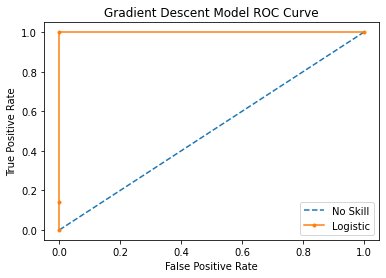

In [26]:
lr_probs = grad_desc.predict_proba(Xvalid)
lr_probs = lr_probs
ns_probs = [0 for _ in range(len(Xvalid))]
ns_auc = roc_auc_score(Yvalid, ns_probs)
lr_auc = roc_auc_score(Yvalid, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Yvalid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Yvalid, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.title("Gradient Descent Model ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("logdes.png")
plt.show()